In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
sns.set()

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/park-biodiversity/species.csv
/kaggle/input/park-biodiversity/parks.csv


In [2]:
parks = pd.read_csv("../input/park-biodiversity/parks.csv")
species = pd.read_csv("../input/park-biodiversity/species.csv")
species.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


# Exploratoration

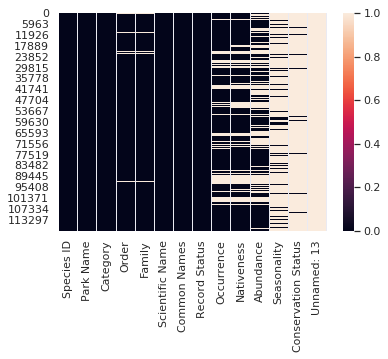

In [3]:
sns.heatmap(species.isnull())

In [4]:
df = pd.crosstab(species['Category'], species['Conservation Status'])
df 

Conservation Status,Breeder,Endangered,Extinct,In Recovery,Migratory,Proposed Endangered,Proposed Threatened,Resident,Species of Concern,Threatened,Under Review
Category,,,,,,,,,,,
Amphibian,0,5,0,0,0,0,0,0,61,8,26
Bird,4,64,0,65,0,2,0,4,2371,51,70
Crab/Lobster/Shrimp,0,1,0,0,0,0,0,0,0,0,1
Fish,1,33,1,0,0,0,0,0,66,40,10
Fungi,0,1,0,0,0,0,0,0,2,0,1
Insect,0,17,0,0,0,1,0,0,107,4,12
Invertebrate,0,9,0,0,0,0,0,0,1,7,4
Mammal,1,93,0,9,2,0,3,0,552,19,1
Nonvascular Plant,0,0,0,0,0,0,0,0,27,0,4


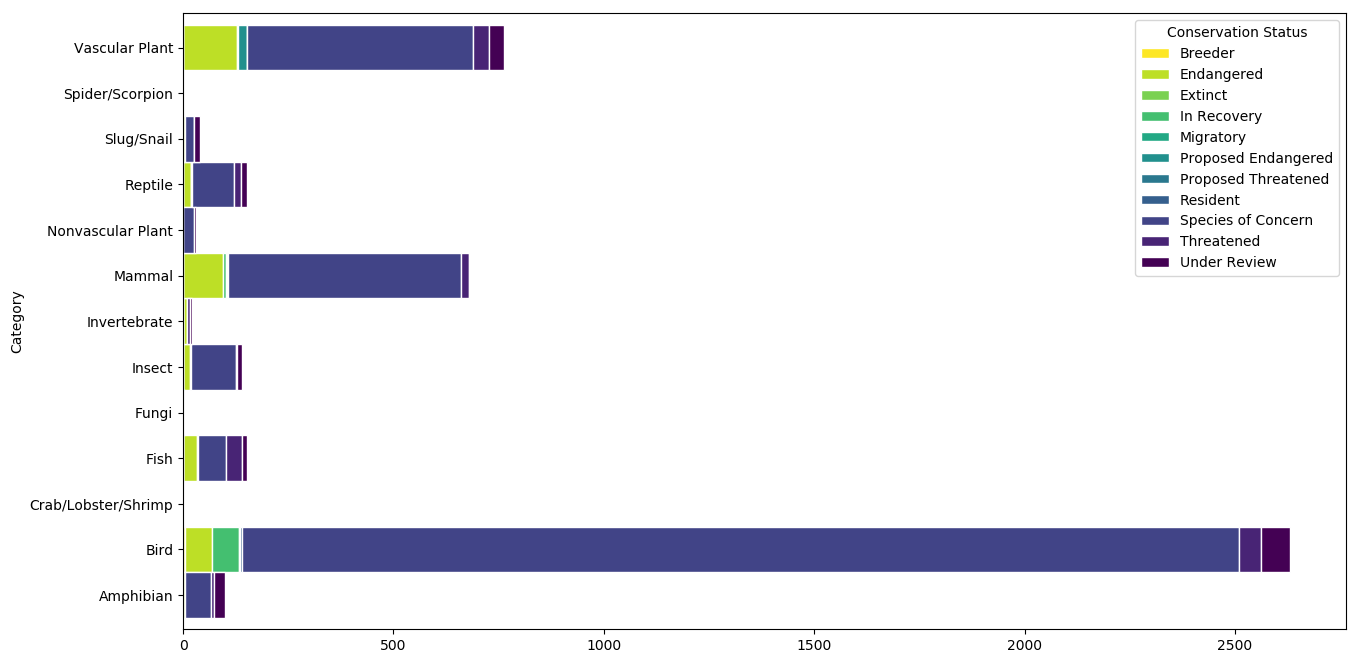

In [5]:
style.use('default')
df.plot.barh(stacked=True, figsize=[15,8],
             edgecolor='white',
             width=1, 
             colormap='viridis_r')

<i>Species of concern</i> is an informal term that refers to those species which Region 3 believes might be in need of concentrated conservation actions. Such conservation actions vary depending on the health of the populations and degree and types of threats. At one extreme, there may only need to be periodic monitoring of populations and threats to the species and its habitat. At the other extreme, a species may need to be listed as a Federal threatened or endangered species. Species of concern receive no legal protection and the use of the term does not necessarily mean that the species will eventually be proposed for listing as a threatened or endangered species.

The above heatmap demonstrate that we need to deal with species that has more important concern, and that is the endangered species. Birds, Mammals and Vascular plants has many endangered species (I can't reverse the color of the heatmap, to visualize it clearly). For now, I focused on data provided on mammals.

I am a first timer in data analysis, so for now I focused on determining which Families/Order are on endangered status.

In [6]:
mammal = species[species['Category']=='Mammal']
mammal_df = pd.crosstab(mammal['Order'], mammal['Conservation Status'], margins=True)
mammal_df.head()

Conservation Status,Breeder,Endangered,In Recovery,Migratory,Proposed Threatened,Species of Concern,Threatened,Under Review,All
Order,,,,,,,,,
Artiodactyla,0,2,0,1,0,25,1,1,30
Carnivora,0,37,7,1,3,105,7,0,160
Cetacea,0,38,2,0,0,0,0,0,40
Chiroptera,0,11,0,0,0,399,10,0,420
Lagomorpha,0,0,0,0,0,5,0,0,5


In [7]:
mammal_df = mammal_df.drop(['All', 'Species of Concern'], axis=1)
mammal_df = mammal_df.drop(['All'], axis=0)

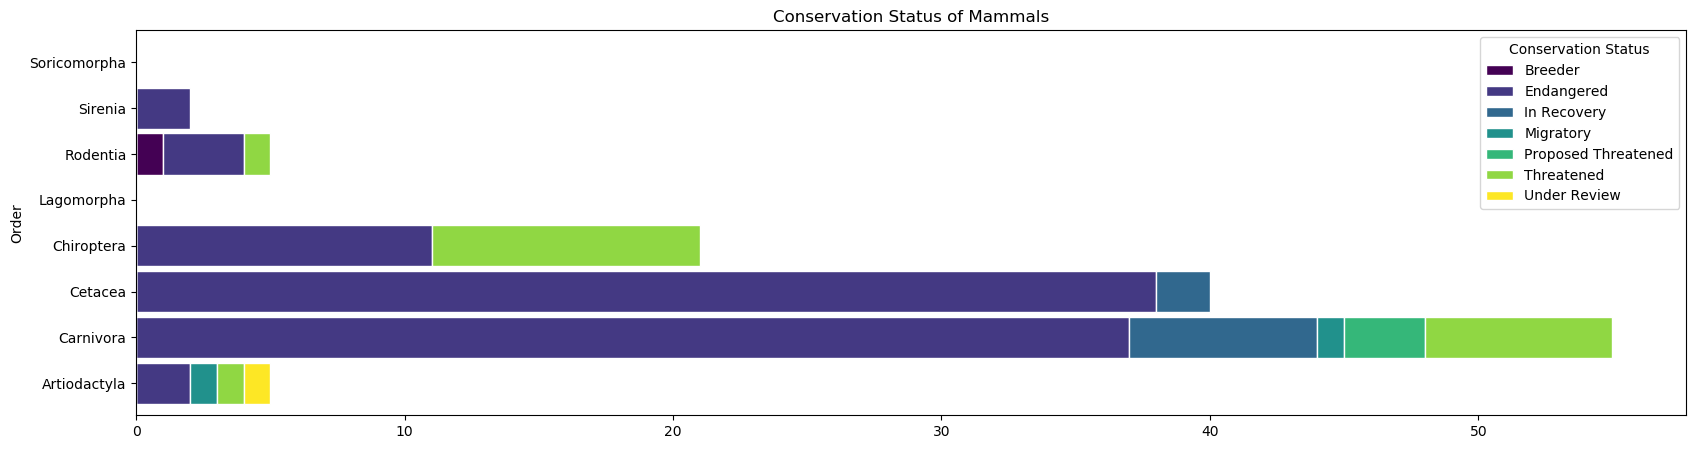

In [8]:
style.use('default')
mammal_df.plot.barh(stacked=True, 
                    figsize=[20,5], 
                    colormap='viridis', 
                    edgecolor='white', 
                    width=0.9,
                    title='Conservation Status of Mammals')

I deleted the <i>Breeder and Resident</i> Column because it does not provide any useful information. 

In [9]:
carn = mammal[mammal['Order']=='Carnivora']
ceta = mammal[mammal['Order']=='Cetacea']
arti = mammal[mammal['Order']=='Artiodactyla']
chir = mammal[mammal['Order']=='Chiroptera']

carn = carn[carn['Conservation Status']=='Endangered']
ceta = ceta[ceta['Conservation Status']=='Endangered']
arti = arti[arti['Conservation Status']=='Endangered']
chir = chir[chir['Conservation Status']=='Endangered']

carn = pd.crosstab(carn['Family'], carn['Conservation Status'], margins=True)
ceta = pd.crosstab(ceta['Family'], ceta['Conservation Status'], margins=True)
arti = pd.crosstab(arti['Family'], arti['Conservation Status'], margins=True)
chir = pd.crosstab(chir['Family'], chir['Conservation Status'], margins=True)

carn = carn.drop(['All'],axis=1)
carn = carn.drop(['All'], axis=0)
carn = carn.reset_index()
carn['specie'] = 'Carnivora'

ceta = ceta.drop(['All'],axis=1)
ceta = ceta.drop(['All'], axis=0)
ceta = ceta.reset_index()
ceta['specie'] = 'Cetacean'

arti = arti.drop(['All'],axis=1)
arti = arti.drop(['All'], axis=0)
arti = arti.reset_index()
arti['specie'] = 'Artiodactyla'

chir = chir.drop(['All'],axis=1)
chir = chir.drop(['All'], axis=0)
chir = chir.reset_index()
chir['specie'] = 'Chiroptera'

In [10]:
df_specie = pd.concat([ceta, carn, arti, chir],axis=0)

In [11]:
df_specie = pd.DataFrame(pd.concat([df_specie['Family'],
                       df_specie['Endangered'],
                       df_specie['specie']], axis=1))
df_specie

,Family,Endangered,specie
0,Balaenidae,2,Cetacean
1,Balaenopteridae,23,Cetacean
2,Eschrichtiidae,4,Cetacean
3,Monodontidae,4,Cetacean
4,Physeteridae,5,Cetacean
0,Canidae,22,Carnivora
1,Felidae,4,Carnivora
2,Mustelidae,6,Carnivora
3,Otariidae,3,Carnivora
4,Phocidae,2,Carnivora


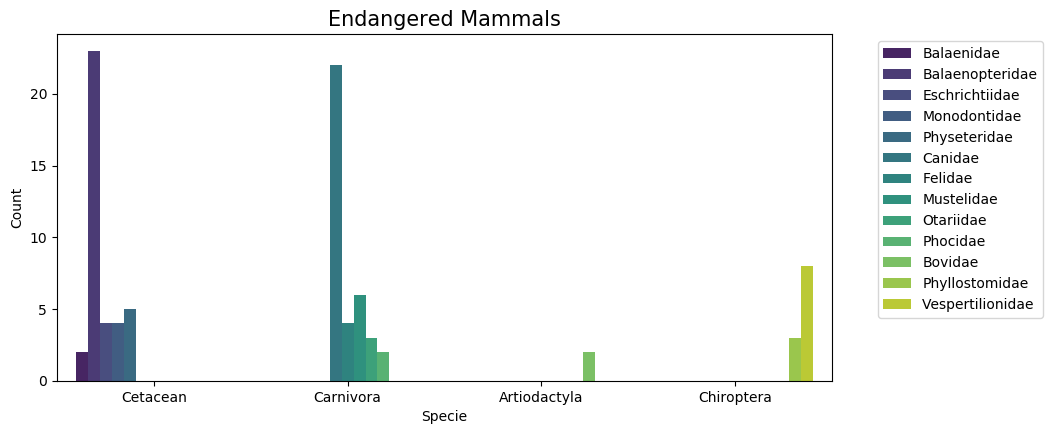

In [12]:
style.use('default')
plt.figure(figsize=[10,4.5])
sns.barplot(x = df_specie['specie'], 
            y = df_specie['Endangered'], 
            hue=df_specie['Family'],
            palette='viridis',
           dodge=True,
           edgecolor='None')
plt.xlabel('Specie')
plt.ylabel('Count')
plt.title('Endangered Mammals', fontsize=15)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [13]:
new_df = species[species['Category']=='Mammal']
new_df = new_df[['Category','Family','Abundance','Nativeness', 'Occurrence', 'Seasonality']]

In [14]:
df_ab = pd.crosstab(new_df['Family'],
           new_df['Abundance'])

df_nat = pd.crosstab(new_df['Family'],
           new_df['Nativeness'])

df_occ = pd.crosstab(new_df['Family'],
           new_df['Occurrence'])


df_seo = pd.crosstab(new_df['Family'],
           new_df['Seasonality'])

In [15]:
df_add = pd.concat([df_ab, df, df_nat, df_occ, df_seo], axis=1)
df_add

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Abundant,Common,Native,Occasional,Rare,Uncommon,Unknown,Breeder,Endangered,Extinct,...,"Breeder, Migratory","Breeder, Resident",Migratory,"Migratory, Summer","Migratory, Winter",Rare,Resident,Summer,Unknown,Vagrant
Amphibian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antilocapridae,0.0,5.0,0.0,1.0,1.0,2.0,6.0,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
Aplodontiidae,0.0,2.0,0.0,1.0,1.0,3.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Balaenidae,0.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Balaenopteridae,0.0,2.0,0.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,...,0.0,0.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tayassuidae,0.0,0.0,0.0,0.0,0.0,1.0,4.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
Trichechidae,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
Ursidae,0.0,22.0,0.0,6.0,4.0,4.0,16.0,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0
Vascular Plant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,128.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_add.fillna(0, inplace=True)

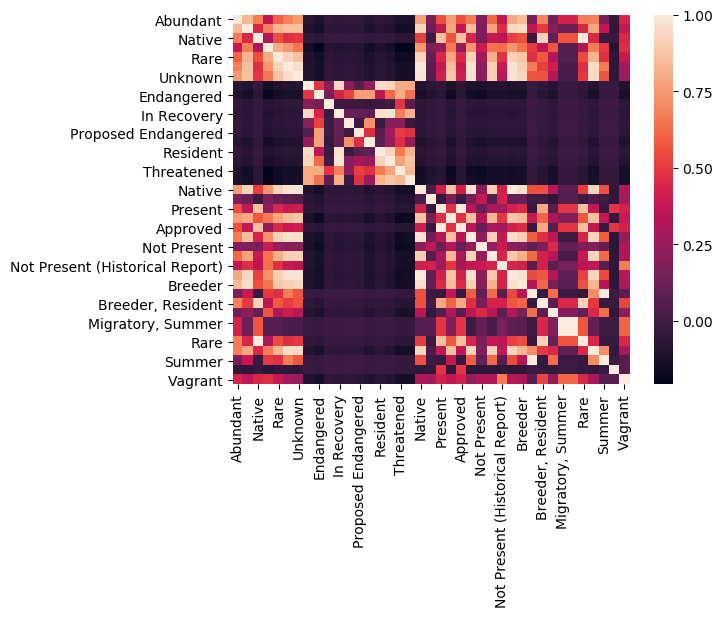

In [17]:
sns.heatmap(df_add.corr())